# Credit Card Churn

[데이터 출처](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers)

- 은행의 한 관리자는 점점 더 많은 고객이 신용 카드 서비스를 떠나는 것에 대해 걱정
- 고객이 이탈할 가능성을 예측하여 능동적으로 고객에게 다가가 더 나은 서비스를 제공하고 고객의 결정을 반대 방향으로 돌릴 수 있도록 이탈 고객 예측 모델을 만들어보도록 함. 
- 데이터 세트는 연령, 급여, 결혼 상태, 신용 카드 한도, 신용 카드 범주 등을 포함하는 10,000명의 고객으로 구성

- CLIENTNUM: int,  고객번호
- Atrition_Flag: str, 현재 상태(Target)
- Customer_Age: int,  고객 연령
- Gender: str, 결혼여부
- Dependent_count: int,  부양가족수
- Education_Level: str, 교육수준
- Marital_Status: str, 결혼 상태
- Income_Category: str, 연간 소득액 기준
- Card_Category: str, 카드 등급
- Months_on_book: int, 은행거래 기간 (월 단위)
- Total_Relationship_Count: int,  총 보유계좌
- Months_Inactive_12_mon: int,  거래내역 없는 거래월 수
- Contacts_Count_12_mon: float, 거래기간 있는 거래월 수
- Credit_Limit: int,  신용한도
- Total_Revolving_Bal: int,  신용카드에서 결제해야 할 평균 금액
- Avg_Open_To_Buy: float, 추가 결제를 위한 신용한도 승인액
- Total_Amt_Chng_Q4_Q1: float, 1분기 대비 4분기 카드 거래금액 비율
- Total_Trans_Amt: int, 12개월 동안의 총 거래금액
- Total_Trans_Ct: int, 12개월 동안의 총 거래건수
- Total_Ct_Chng_Q4_Q1: float,	1분기 대비 4분기 거래건수 비율
- Total_Utilization_Ratio : float, 평균 카드 이용률

## Import package

In [102]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from tqdm import tqdm
import time

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns',None)

In [2]:
glob('*.csv')

['BankChurners.csv']

In [70]:
data = pd.read_csv('BankChurners.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [71]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [72]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [73]:
# pr = data.profile_report()
# pr

In [74]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [75]:
# categorical data -> numeric data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [76]:
dic = {'Existing Customer':0,'Attrited Customer':1}
data['class'] = data['Attrition_Flag'].apply(lambda x: dic[x])

In [77]:
data[['Attrition_Flag','class']]

,Attrition_Flag,class
0,Existing Customer,0
1,Existing Customer,0
2,Existing Customer,0
3,Existing Customer,0
4,Existing Customer,0
...,...,...
10122,Existing Customer,0
10123,Attrited Customer,1
10124,Attrited Customer,1
10125,Attrited Customer,1


In [78]:
data.drop('Attrition_Flag', axis=1,inplace=True)

In [80]:
data.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'NB_mon1',
                     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'NB_mon2'},inplace=True)

In [81]:
data = data.drop(['NB_mon1','NB_mon2'],axis=1)

In [14]:
data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'class'],
      dtype='object')

In [82]:
cat_features = data.select_dtypes(include=['object']).columns.to_list()
num_features = data.select_dtypes(exclude=['object']).columns.to_list()

In [83]:
cat_features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [84]:
#sex
for feature in cat_features:
    le = LabelEncoder()
    le.fit(data[feature].drop_duplicates())
    data[feature] = le.transform(data[feature])

In [85]:
data.corr()['class'].sort_values()

Total_Trans_Ct             -0.371403
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Revolving_Bal        -0.263053
Avg_Utilization_Ratio      -0.178410
Total_Trans_Amt            -0.168598
Total_Relationship_Count   -0.150005
Total_Amt_Chng_Q4_Q1       -0.131063
CLIENTNUM                  -0.046430
Gender                     -0.037272
Credit_Limit               -0.023873
Card_Category              -0.006038
Avg_Open_To_Buy            -0.000285
Education_Level             0.005551
Months_on_book              0.013687
Income_Category             0.017584
Customer_Age                0.018203
Marital_Status              0.018597
Dependent_count             0.018991
Months_Inactive_12_mon      0.152449
Contacts_Count_12_mon       0.204491
class                       1.000000
Name: class, dtype: float64

In [86]:
data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'class'],
      dtype='object')

In [87]:
def histogram(column: str):
    fig, axes= plt.subplots(1,1)
    return axes.hist(data[column])

(array([2.650e+02, 6.540e+02, 1.478e+03, 1.778e+03, 2.422e+03, 1.920e+03,
        9.210e+02, 5.350e+02, 1.520e+02, 2.000e+00]),
 array([26. , 30.7, 35.4, 40.1, 44.8, 49.5, 54.2, 58.9, 63.6, 68.3, 73. ]),
 <BarContainer object of 10 artists>)

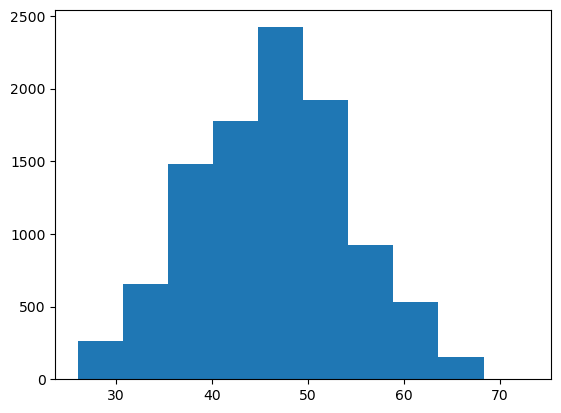

In [88]:
histogram('Customer_Age')

(array([5358.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4769.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

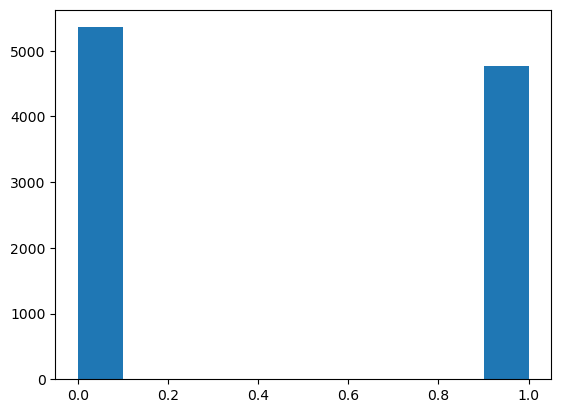

In [89]:
histogram('Gender')

(array([ 904.,    0., 1838.,    0., 2655.,    0., 2732.,    0., 1574.,
         424.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

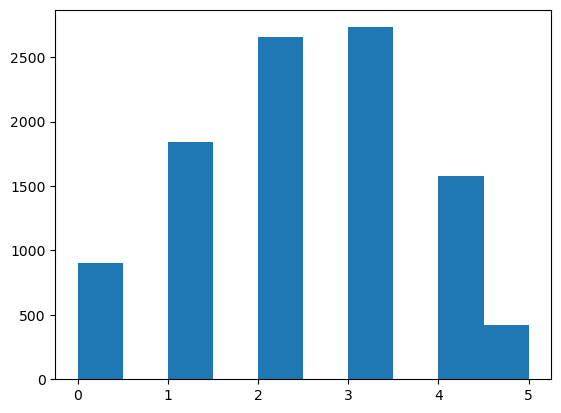

In [90]:
histogram('Dependent_count')

(array([8500.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1627.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

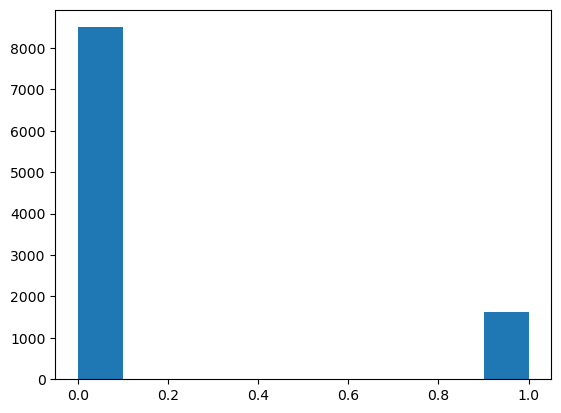

In [91]:
histogram('class')

In [92]:
# Generate x and y sets
x = data.drop('class', axis=1).values
y = data['class']

In [94]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data, test_size = 0.2, random_state=1234)

In [30]:
# Importing packages for SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler

from imblearn.pipeline import Pipeline

from collections import Counter

In [37]:
sm = SMOTE(sampling_strategy='auto', random_state=1234)
x_sm, y_sm = sm.fit_resample(x, y)

In [38]:
from imblearn.under_sampling import TomekLinks

In [39]:
tl = TomekLinks(sampling_strategy='majority')
x_tmk, y_tmk = tl.fit_resample(x, y)

In [40]:
from imblearn.combine import SMOTETomek

In [41]:
smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x_smoteto, y_smoteto = smoteto.fit_resample(x, y)

In [44]:
x_sm = pd.DataFrame(x_sm)
x_sm[20] = y_sm

In [46]:
x_tmk = pd.DataFrame(x_tmk)
x_tmk[20] = y_tmk

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,768805383.0,45.0,1.0,3.0,3.0,1.0,2.0,0.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,818770008.0,49.0,0.0,5.0,2.0,2.0,4.0,0.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,713982108.0,51.0,1.0,3.0,2.0,1.0,3.0,0.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,769911858.0,40.0,0.0,4.0,3.0,3.0,4.0,0.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,709106358.0,40.0,1.0,3.0,5.0,1.0,2.0,0.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000


In [50]:
x_smoteto = pd.DataFrame(x_smoteto)
x_smoteto[20] = y_smoteto

In [51]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [53]:
# split data

train_sm, test_sm = train_test_split(x_sm, test_size=0.2, random_state=1234)
train_tmk, test_tmk = train_test_split(x_tmk, test_size=0.2, random_state=1234)
train_smoteto, test_smoteto = train_test_split(x_smoteto, test_size=0.2, random_state=1234)

In [95]:
train_data = TabularDataset(train)
test_data= TabularDataset(train)

In [54]:
train_data1 = TabularDataset(train_sm)
test_data1 = TabularDataset(test_sm)

train_data2 = TabularDataset(train_tmk)
test_data2 = TabularDataset(test_tmk)

train_data3 = TabularDataset(train_smoteto)
test_data3 = TabularDataset(test_smoteto)

In [55]:
# define target column
label = 20

In [ ]:
predictor = TabularPredictor(label='class', eval_metric='logloss').fit(train_data)

In [107]:
predictor1 = TabularPredictor(label=label, eval_metric='precision').fit(train_data1)

No path specified. Models will be saved in: "AutogluonModels/ag-20230410_014835/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230410_014835/"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 22.3.0: Mon Jan 30 20:38:37 PST 2023; root:xnu-8792.81.3~2/RELEASE_ARM64_T6000
Train Data Rows:    13600
Train Data Columns: 20
Label Column: 20
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available 

In [108]:
predictor2 = TabularPredictor(label=label, eval_metric='precision').fit(train_data2)

No path specified. Models will be saved in: "AutogluonModels/ag-20230410_014925/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230410_014925/"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 22.3.0: Mon Jan 30 20:38:37 PST 2023; root:xnu-8792.81.3~2/RELEASE_ARM64_T6000
Train Data Rows:    7519
Train Data Columns: 20
Label Column: 20
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available M

In [109]:
predictor3 = TabularPredictor(label=label, eval_metric='precision').fit(train_data3)

No path specified. Models will be saved in: "AutogluonModels/ag-20230410_014946/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20230410_014946/"
AutoGluon Version:  0.7.0
Python Version:     3.8.16
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 22.3.0: Mon Jan 30 20:38:37 PST 2023; root:xnu-8792.81.3~2/RELEASE_ARM64_T6000
Train Data Rows:    12795
Train Data Columns: 20
Label Column: 20
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available 

[1000]	valid_set's binary_logloss: 0.0419567	valid_set's precision: 0.983965


	0.9868	 = Validation score   (precision)
	6.45s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...
	0.9854	 = Validation score   (precision)
	3.52s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.9668	 = Validation score   (precision)
	0.82s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.9696	 = Validation score   (precision)
	0.81s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	0.9883	 = Validation score   (precision)
	4.92s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.9657	 = Validation score   (precision)
	0.41s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.9641	 = Validation score   (precision)
	0.41s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.9703	 = Validation score   (precision)
	7.77s	 = Training   runtime

In [114]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.989297,0.893130,0.023444,0.003878,1.361955,0.023444,0.003878,1.361955,1,True,11
1,LightGBMLarge,0.988532,0.885496,0.063251,0.007989,11.612269,0.063251,0.007989,11.612269,1,True,13
2,NeuralNetTorch,0.986239,0.870229,0.018534,0.006469,11.217186,0.018534,0.006469,11.217186,1,True,12
3,WeightedEnsemble_L2,0.980887,0.923664,0.130749,0.018504,17.812375,0.002674,0.001061,0.512352,2,True,14
4,RandomForestEntr,0.980122,0.801527,0.087014,0.036978,0.479303,0.087014,0.036978,0.479303,1,True,6
5,RandomForestGini,0.980122,0.801527,0.087943,0.036201,0.482891,0.087943,0.036201,0.482891,1,True,5
6,LightGBM,0.974006,0.893130,0.014737,0.003035,2.932836,0.014737,0.003035,2.932836,1,True,4
7,ExtraTreesGini,0.967890,0.679389,0.103334,0.038054,0.333206,0.103334,0.038054,0.333206,1,True,8
8,ExtraTreesEntr,0.966361,0.664122,0.100083,0.038193,0.339394,0.100083,0.038193,0.339394,1,True,9
9,LightGBMXT,0.954128,0.870229,0.024669,0.003929,2.971605,0.024669,0.003929,2.971605,1,True,3


In [118]:
predictor1.leaderboard(test_data1, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.989814,0.988183,0.012854,0.002796,4.533651,0.012854,0.002796,4.533651,1,True,7
1,LightGBM,0.989228,0.988183,0.068896,0.014401,5.571201,0.068896,0.014401,5.571201,1,True,4
2,WeightedEnsemble_L2,0.988670,0.992604,0.143014,0.066664,12.347076,0.001983,0.001566,0.695458,2,True,14
3,XGBoost,0.987455,0.989660,0.013972,0.006048,1.612562,0.013972,0.006048,1.612562,1,True,11
4,LightGBMXT,0.986944,0.988287,0.035106,0.010774,5.036874,0.035106,0.010774,5.036874,1,True,3
5,LightGBMLarge,0.982738,0.985316,0.024294,0.007288,10.202943,0.024294,0.007288,10.202943,1,True,13
6,RandomForestGini,0.974601,0.969653,0.069642,0.043634,0.861566,0.069642,0.043634,0.861566,1,True,5
7,NeuralNetFastAI,0.974224,0.969914,0.036807,0.011777,7.257697,0.036807,0.011777,7.257697,1,True,10
8,RandomForestEntr,0.972861,0.970972,0.074284,0.040135,0.902355,0.074284,0.040135,0.902355,1,True,6
9,NeuralNetTorch,0.972765,0.966906,0.013909,0.008375,9.082204,0.013909,0.008375,9.082204,1,True,12


In [119]:
predictor2.leaderboard(test_data2, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,1.000000,1.000000,0.001306,0.001697,1.823987,0.001306,0.001697,1.823987,1,True,4
1,LightGBMLarge,1.000000,1.000000,0.002377,0.001785,5.998048,0.002377,0.001785,5.998048,1,True,13
2,LightGBMXT,1.000000,1.000000,0.002565,0.001699,1.850837,0.002565,0.001699,1.850837,1,True,3
3,WeightedEnsemble_L2,1.000000,1.000000,0.003608,0.002688,2.349864,0.001043,0.000989,0.499027,2,True,14
4,CatBoost,0.945455,0.964912,0.007246,0.001731,1.055627,0.007246,0.001731,1.055627,1,True,7
5,XGBoost,0.940000,0.960938,0.007969,0.002999,1.071856,0.007969,0.002999,1.071856,1,True,11
6,RandomForestGini,0.928315,0.941667,0.048436,0.037268,0.478922,0.048436,0.037268,0.478922,1,True,5
7,ExtraTreesEntr,0.927273,0.954545,0.060670,0.037973,0.347514,0.060670,0.037973,0.347514,1,True,9
8,RandomForestEntr,0.926740,0.957265,0.055002,0.037434,0.450763,0.055002,0.037434,0.450763,1,True,6
9,ExtraTreesGini,0.909091,0.964706,0.059454,0.037858,0.331488,0.059454,0.037858,0.331488,1,True,8


In [120]:
predictor3.leaderboard(test_data3, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,0.985816,0.988304,0.008851,0.002648,4.924145,0.008851,0.002648,4.924145,1,True,7
1,WeightedEnsemble_L2,0.985816,0.988304,0.010347,0.004232,5.594746,0.001496,0.001584,0.670601,2,True,14
2,XGBoost,0.984542,0.986861,0.023256,0.008840,2.398722,0.023256,0.008840,2.398722,1,True,11
3,LightGBM,0.982861,0.985401,0.017882,0.008030,3.519989,0.017882,0.008030,3.519989,1,True,4
4,LightGBMLarge,0.981099,0.986823,0.047340,0.015129,13.629115,0.047340,0.015129,13.629115,1,True,13
5,LightGBMXT,0.980035,0.986842,0.046194,0.016491,6.445741,0.046194,0.016491,6.445741,1,True,3
6,RandomForestEntr,0.965578,0.969609,0.061659,0.040877,0.814925,0.061659,0.040877,0.814925,1,True,6
7,RandomForestGini,0.964390,0.966811,0.069238,0.041628,0.824562,0.069238,0.041628,0.824562,1,True,5
8,ExtraTreesEntr,0.962769,0.964132,0.090322,0.040824,0.409729,0.090322,0.040824,0.409729,1,True,9
9,ExtraTreesGini,0.960465,0.965665,0.077037,0.041806,0.411130,0.077037,0.041806,0.411130,1,True,8
